###### Problem Statement:-


1.   Does Age of a person play a major role in class?
2.   Does education play a major role in class?
3.   What is the minimum level of education needed to a high class?
4.   Will marital status affect the class of a person?
5.   Will sex of a person determine his/her high class?




###### **Import the libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import display
from sklearn import preprocessing,tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


###### **Import dataset**

In [4]:
df = pd.read_excel('census_data.xlsx')


###### **Show by default 5 records from dataset.**

In [5]:
print(df.head())

   age          workclass  Final-weight  ... hours-per-week  native-country   class
0   39          State-gov         77516  ...             40   United-States   <=50K
1   50   Self-emp-not-inc         83311  ...             13   United-States   <=50K
2   38            Private        215646  ...             40   United-States   <=50K
3   53            Private        234721  ...             40   United-States   <=50K
4   28            Private        338409  ...             40            Cuba   <=50K

[5 rows x 15 columns]


In [6]:
print(df.shape)                       #Checking how many (Rows, Columns) are present in data.
print(type(df))                       #checking class of dataset.
print(df.columns)                     #checking the data's columns name before modification
df.columns = df.columns.str.lower()   #editing all columns with lowercase string.                  
print(df.columns)                     #checking the data's columns name after modification  

(32561, 15)
<class 'pandas.core.frame.DataFrame'>
Index(['age', 'workclass', 'Final-weight', 'education', 'education-num',
       'Marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-Gain', 'Capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')
Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')


###### Let's drop some columns like -
###### 1. final-weight - seems exactly like Entry_ID column
###### 2. capital.gain - 90% of the values are 0
###### 3. capital.loss - same as above(95% of the values are 0)


In [7]:
df=df[['age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'hours-per-week', 'native-country','class']]

###### **Triming the whitesace**

In [8]:
df['workclass'] = df['workclass'].str.strip()    
df['education'] = df['education'].str.strip()  
df['marital-status'] = df['marital-status'].str.strip()  
df['occupation'] = df['occupation'].str.strip()  
df['relationship'] = df['relationship'].str.strip() 
df['race'] = df['race'].str.strip() 
df['sex'] = df['sex'].str.strip() 
df['class'] = df['class'].str.strip()  
df['native-country'] = df['native-country'].str.strip()


In [9]:
display(df.describe())     
display(df.info())

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456
std,13.640433,2.572720,12.347429
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours-per-week  32561 non-null  int64 
 10  native-country  32561 non-null  object
 11  class           32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


None

###### **Analysing the number of males and females%**

In [38]:
no_of_female = df[df['sex']=='Female'].count()['sex']
total_sex = df.count()['sex']
display('Female {}%'.format(round(no_of_female / total_sex * 100)))



no_of_male = df[df['sex']=='Male'].count()['sex']
total_sex = df.count()['sex']
display('Male {}%'.format(round(no_of_male / total_sex * 100)))

'Female 33%'

'Male 67%'

###### **Analysing the count of native-country**

In [39]:
df['native-country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

######  **1. Checking Missing Value and Impute it.**

In [11]:
df.replace({"?": np.nan}, inplace = True)  #Replace ? with np.nan. Here missing values encoded with the"?". 
print(df.head())

   age         workclass  education  ...  hours-per-week native-country  class
0   39         State-gov  Bachelors  ...              40  United-States  <=50K
1   50  Self-emp-not-inc  Bachelors  ...              13  United-States  <=50K
2   38           Private    HS-grad  ...              40  United-States  <=50K
3   53           Private       11th  ...              40  United-States  <=50K
4   28           Private  Bachelors  ...              40           Cuba  <=50K

[5 rows x 12 columns]


In [12]:
print(df.isna().sum())                     #count the number of missing values

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours-per-week       0
native-country     583
class                0
dtype: int64


In [13]:
df.workclass = df.workclass.fillna(df.workclass.mode()[0])
df.occupation = df.occupation.fillna(df.occupation.mode()[0])
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])  #imputation
print(df.isna().sum())  

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
class             0
dtype: int64


###### **2. Checking Outliers and Impute it.**

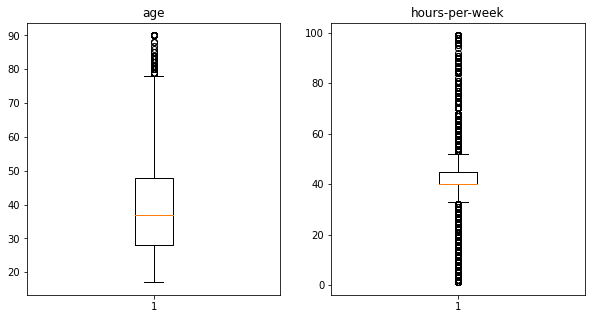

In [14]:
plt.rcParams['figure.figsize'] = (10,5)

col_list=['age','hours-per-week']

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.boxplot(df[col_list[i]])
    plt.title(col_list[i])

plt.show()

In [15]:
from scipy.stats.mstats import winsorize
df["age"] = winsorize(df["age"],(0,0.15))
df["hours-per-week"]= winsorize(df["hours-per-week"],(0.12,0.18))

In [16]:
census_dataset=df.copy()
display(census_dataset.shape)

(32561, 12)

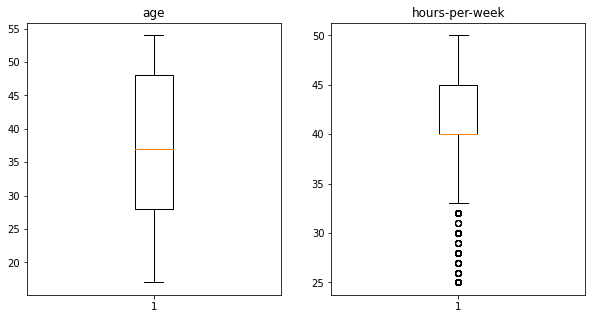

In [17]:
plt.rcParams['figure.figsize'] = (10,5)

col_list=['age','hours-per-week']

for i in range(2):
    plt.subplot(1,2,i+1)
    plt.boxplot(census_dataset[col_list[i]])
    plt.title(col_list[i])

plt.show()

###### **Feature Engineering**

###### **Binning**

In [18]:
census_dataset['age-group'] = pd.cut(census_dataset['age'], bins=[15,24,64,90], 
                                     labels=["Youth(15-24)", "Adults(25-64)", "Seniors(65-90)"])
census_dataset['age-group'].value_counts()

Adults(25-64)     26991
Youth(15-24)       5570
Seniors(65-90)        0
Name: age-group, dtype: int64

In [19]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
census_dataset['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
census_dataset['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)

census_dataset['marital-status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital-status, dtype: int64

In [20]:
census_dataset['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             'School', inplace = True)
census_dataset['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
School           4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

In [21]:
census_dataset['per-week-hours-group'] = pd.cut(census_dataset['hours-per-week'], bins = [1, 24, 48, 72, 96, 120], 
                                   labels = ['1-24 hrs', '25-48 hrs', '49-72 hrs', '73-96 hrs', '97-120 hrs'])
census_dataset['per-week-hours-group'].value_counts()

25-48 hrs     26070
49-72 hrs      6491
97-120 hrs        0
73-96 hrs         0
1-24 hrs          0
Name: per-week-hours-group, dtype: int64

###### **Count Plots for categorical attributes**

###### **native-country,race,per-week-hours-group and occupation vs class**

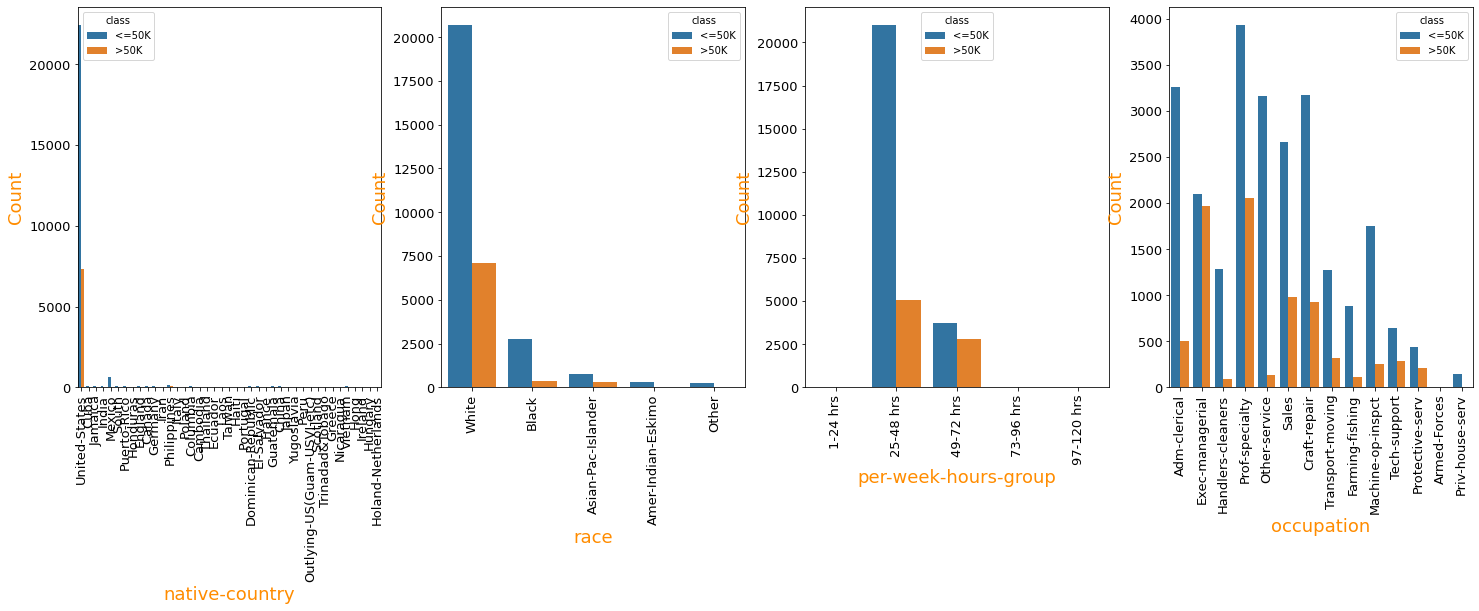

In [22]:
plt.figure(figsize=(25,7))

deg=["native-country","race","per-week-hours-group","occupation"]

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.countplot(x=deg[i],data=census_dataset,hue='class')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()


###### **age-group,education,marital-status and workclass vs class**

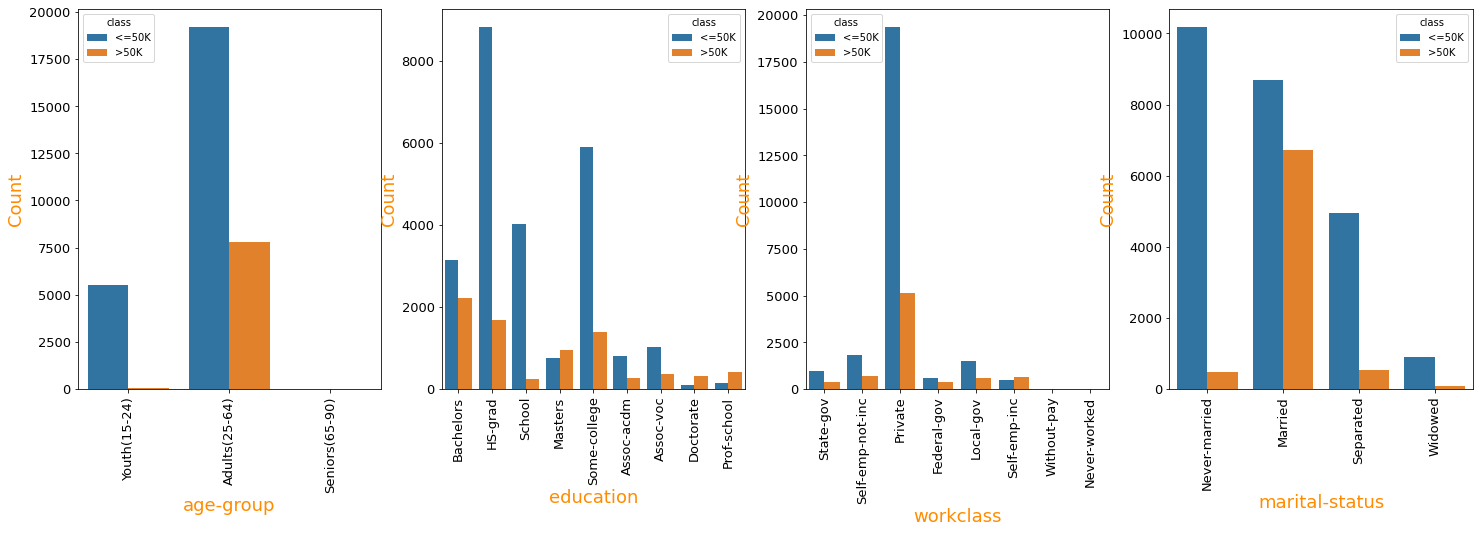

In [23]:
plt.figure(figsize=(25,7))

deg=["age-group","education","workclass","marital-status"]

for i in range(4):
    plt.subplot(1,4,i+1)
    sns.countplot(x=deg[i],data=census_dataset,hue='class')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()


###### **In Above age-group charts**, 
1. People with age between 25 to 64 are more likely to fall into <=50k class category.

###### **In Above education charts**, 
1. People with HS-grad category is more likely to fall into <=50k class category and People with Bachelors category is more likely to fall into >50k class category.

###### **In Above workclass charts**, 
1. People working in private companies have high probability of under class <=50k and Every category of workclass comes under the <=50k rather than >50K.

###### **In Above marital-status charts**, 
1. People with Never-married category is more likely to fall into <=50k class category and People with married category is more likely to fall into >50k class category.



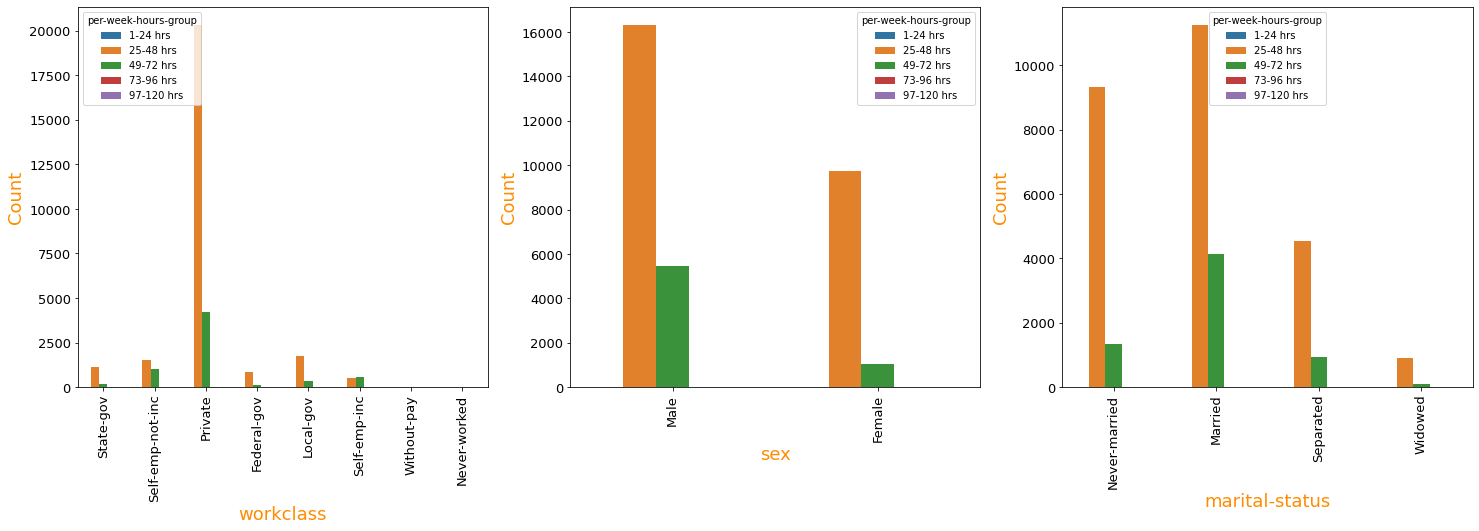

In [24]:
plt.figure(figsize=(25,7))

deg=["workclass","sex","marital-status"]

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.countplot(x=deg[i],data=census_dataset,hue='per-week-hours-group')
    plt.xlabel(deg[i],color="darkorange",fontsize=18)
    plt.ylabel("Count",color="darkorange",fontsize=18)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=90,fontsize=13)

plt.show()

In [25]:
#census_dataset.to_excel("census_dataset.xlsx",index=False)

In [26]:
census_dataset.describe()

,age,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000
mean,37.407942,10.080679,39.901017
std,11.500294,2.572720,7.484148
min,17.000000,1.000000,25.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,54.000000,16.000000,50.000000


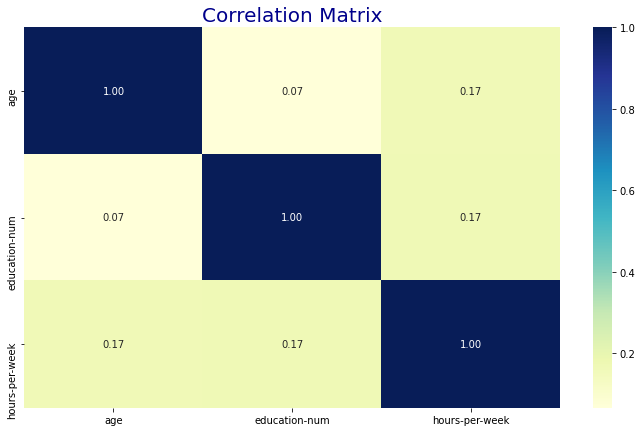

In [27]:
list=['age','education-num','hours-per-week']
plt.figure(figsize=(12,7))
sns.heatmap(df[list].corr(),annot=True, fmt = ".2f", cmap = "YlGnBu")
plt.title("Correlation Matrix",color="darkblue",fontsize=20)
plt.show()

In [28]:
X = census_dataset.drop(['class'], axis=1)
Y = census_dataset['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
categorical = ['age-group', 'per-week-hours-group','workclass','education', 'marital-status', 'occupation', 'relationship','race', 'sex','native-country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
display(X_train.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,age-group,per-week-hours-group
0,0.659537,-0.082194,-0.324201,-0.414963,-0.897664,-1.036632,-0.898445,0.396164,0.701715,1.350315,0.258860,-0.452384,2.003957
1,0.833814,2.631509,-0.324201,-0.414963,1.482876,-1.539627,1.591127,0.396164,-1.425079,-0.257422,0.258860,-0.452384,-0.499013
2,0.920953,-0.082194,1.336010,-0.025832,-0.897664,1.226844,-0.898445,0.396164,0.701715,1.350315,0.258860,-0.452384,2.003957
3,-0.734679,-0.082194,-0.324201,-0.414963,0.292606,-1.036632,-0.276052,0.396164,0.701715,0.010534,-4.026487,-0.452384,-0.499013
4,-1.257510,-0.082194,0.920957,-2.360620,0.292606,-1.036632,-0.276052,0.396164,0.701715,-1.999138,-4.356130,2.210512,-0.499013


In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
display(acc_random_forest)

95.44

In [30]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(5)

,importance
feature,
age,0.246
occupation,0.124
education-num,0.119
relationship,0.113
marital-status,0.103


###### Conclusion:


1.   Age of a person play a role because more the age, probability of getting   over 50K annual class will increase.
2.   Education play a major role in class, having higher education of Bachelors will increase the probability of getting >50K.
3.   For the better class, individuals with higher education.
4.   Marital-status play a important role in class. If a person is married, his/her probability of getting over 50K annual class will increase significantly.
5.  The sex doesn't play an important role. the most cases man and woman both have similar class if the other factors are same.

